In [1]:
## Import the necessary libraries

In [1]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("MLJ")
Pkg.add("MLJBase")
Pkg.add("DecisionTree")

    Updating registry at `C:\Users\THIS PC\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`


In [2]:
Pkg.add("CSV")

   Resolving package versions...
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\THIS PC\.julia\environments\v1.10\Manifest.toml`


In [3]:
## import and read the dataset
using CSV
using DataFrames

data_set = CSV.read("fish_data.csv", DataFrame)
first(data_set, 5)

5×4 DataFrame
 Row │ species             length   weight   w_l_ratio 
     │ String31            Float64  Float64  Float64   
─────┼─────────────────────────────────────────────────
   1 │ Anabas testudineus    10.66     3.45       0.32
   2 │ Anabas testudineus     6.91     3.27       0.47
   3 │ Anabas testudineus     8.38     3.46       0.41
   4 │ Anabas testudineus     7.57     3.36       0.44
   5 │ Anabas testudineus    10.83     3.38       0.31

In [4]:
## Split the whole dataset into training set and testing set

In [11]:
using MLJBase

training_set, testing_set = partition(data_set,0.8, shuffle=false)
first(training_set,5)

5×4 DataFrame
 Row │ species             length   weight   w_l_ratio 
     │ String31            Float64  Float64  Float64   
─────┼─────────────────────────────────────────────────
   1 │ Anabas testudineus    10.66     3.45       0.32
   2 │ Anabas testudineus     6.91     3.27       0.47
   3 │ Anabas testudineus     8.38     3.46       0.41
   4 │ Anabas testudineus     7.57     3.36       0.44
   5 │ Anabas testudineus    10.83     3.38       0.31

In [12]:
first(testing_set,5)

5×4 DataFrame
 Row │ species         length   weight   w_l_ratio 
     │ String31        Float64  Float64  Float64   
─────┼─────────────────────────────────────────────
   1 │ Setipinna taty    17.17     3.05       0.18
   2 │ Setipinna taty    19.1      2.97       0.16
   3 │ Setipinna taty    17.8      3.22       0.18
   4 │ Setipinna taty    18.11     3.17       0.18
   5 │ Setipinna taty    17.5      3.17       0.18

## Explotary Data Analysis (EDA)

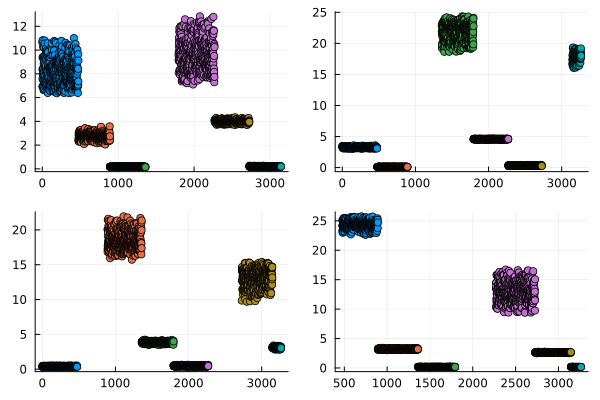

In [31]:
using StatsPlots

@df training_set scatter(
    [:length, :weight, :w_l_ratio],
    group = :species,
    layout = (2, 2),
    legend = :false
)


In [6]:
## check the null values of the dataset

In [32]:
allowmissing!(training_set)
col_has_missing = map(col->any(ismissing,col), eachcol(data_set))
col_has_missing

4-element Vector{Bool}:
 0
 0
 0
 0

In [8]:
## Verify the dimension of the dataset

In [9]:
println("Total Observations: ", size(data_set,1))
println("Total Features: ", size(data_set,2))


Total Observations: 4080
Total Features: 4


In [10]:
## Split the dataset into the independent variables (x) and dependent variable (y)

In [17]:
X = Matrix(data_set[:,Not(:species)])
first(X,5)

5-element Vector{Float64}:
 10.66
  6.91
  8.38
  7.57
 10.83

In [18]:
y= Vector(data_set[:, :species])
first(y,5)

5-element Vector{String31}:
 "Anabas testudineus"
 "Anabas testudineus"
 "Anabas testudineus"
 "Anabas testudineus"
 "Anabas testudineus"

In [12]:
using DecisionTree
using Random

In [13]:
## set the random seed for reproducibility
Random.seed!(123)

TaskLocalRNG()

In [14]:
## Create the random permutation of indices

In [15]:
indices = shuffle(1:size(X, 1))
first(indices,5)

5-element Vector{Int64}:
 3538
 2213
  230
 2411
 2148

In [16]:
## Define the split ratio

In [17]:
train_ratio = 0.8
train_size = Int(round(train_ratio *size(X,1)))

3264

In [18]:
## Split the indices

In [19]:
train_indices = indices[1:train_size]
test_indices = indices[(train_size + 1):end]

816-element Vector{Int64}:
  290
  852
   39
  586
 2181
 2354
 3270
 1840
 3062
   85
 1292
  183
  551
    ⋮
 1622
 3209
  175
 1974
  805
 1863
 3023
   89
  654
 3922
 1998
 1706

In [20]:
## create the training and testing set

In [21]:
X_train = X[train_indices,:]
y_train = y[train_indices]
X_test =X[test_indices,:]
y_test = X[test_indices]

816-element Vector{Union{Missing, Float64}}:
  6.58
 23.87
  7.23
 24.5
 12.2
 13.17
 16.23
 11.13
 13.66
  8.31
 17.09
 10.59
 24.74
  ⋮
 22.7
 17.51
  7.53
  8.13
 24.55
  8.38
 11.71
  6.7
 24.04
 32.34
  9.2
 19.2

In [22]:
## create the model

In [23]:
model = RandomForestClassifier(n_trees=10)

RandomForestClassifier
n_trees:             10
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             nothing
ensemble:            nothing

In [24]:
## fit the model on training data

In [25]:
fit!(model,X_train,y_train)

RandomForestClassifier
n_trees:             10
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             Union{Missing, String31}[String31("Anabas testudineus"), String31("Coilia dussumieri"), String31("Otolithoides biauritus"), String31("Otolithoides pama"), String31("Pethia conchonius"), String31("Polynemus paradiseus"), String31("Puntius lateristriga"), String31("Setipinna taty"), String31("Sillaginopsis panijus")]
ensemble:            Ensemble of Decision Trees
Trees:      10
Avg Leaves: 142.2
Avg Depth:  24.5

In [26]:
## Display the train and test size

In [27]:
println("Training Set Size: ", size(X_train), " Features: ", length(y_train),"Labels")
println("Testing Set Size: ", size(X_test), " Features: ", length(y_test),"Labels")

Training Set Size: (3264, 3) Features: 3264Labels
Testing Set Size: (816, 3) Features: 816Labels


In [28]:
## Make the predictions

In [29]:
y_pred = predict(model, X_test)

816-element Vector{Union{Missing, String31}}:
 "Anabas testudineus"
 "Coilia dussumieri"
 "Anabas testudineus"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Polynemus paradiseus"
 "Setipinna taty"
 "Pethia conchonius"
 "Puntius lateristriga"
 "Anabas testudineus"
 "Otolithoides biauritus"
 "Anabas testudineus"
 "Coilia dussumieri"
 ⋮
 "Otolithoides pama"
 "Setipinna taty"
 "Anabas testudineus"
 "Pethia conchonius"
 "Coilia dussumieri"
 "Pethia conchonius"
 "Puntius lateristriga"
 "Anabas testudineus"
 "Coilia dussumieri"
 "Sillaginopsis panijus"
 "Pethia conchonius"
 "Otolithoides pama"

In [30]:
## Check the model accuracy

In [31]:
accuracy = sum(y_pred .== y_test)/length(y_test)
println("Accuracy ", accuracy)

Accuracy 0.0


In [32]:
# Assuming the model expects Union{Missing, Float64} data type
#31.25	6.14	0.2
sample_data = [31.25,6.14, 0.2]
# Handle missing data or mismatched types
sample_data = Vector{Union{Missing, Float64}}(sample_data)

# Reshape the data to a 1xN matrix if needed
sample_matrix = reshape(sample_data, 1, :)

# Then predict
predictions = predict(model, sample_matrix)

1-element Vector{Union{Missing, String31}}:
 "Sillaginopsis panijus"